In [1]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1634
            Open  High   Low  Close  Volume Ticker
Time                                              
2017-06-02  3410  3440  3290   3320    2580    VIB
2017-06-05  3320  3410  3290   3290   39900    VIB
2017-06-06  3310  3320  3290   3320   53340    VIB
2017-06-07  3420  3420  3310   3340   69855    VIB
2017-06-08  3310  3310  3290   3310   50310    VIB
2017-06-09  3290  3310  3290   3290   43100    VIB


<Axes: xlabel='Time'>

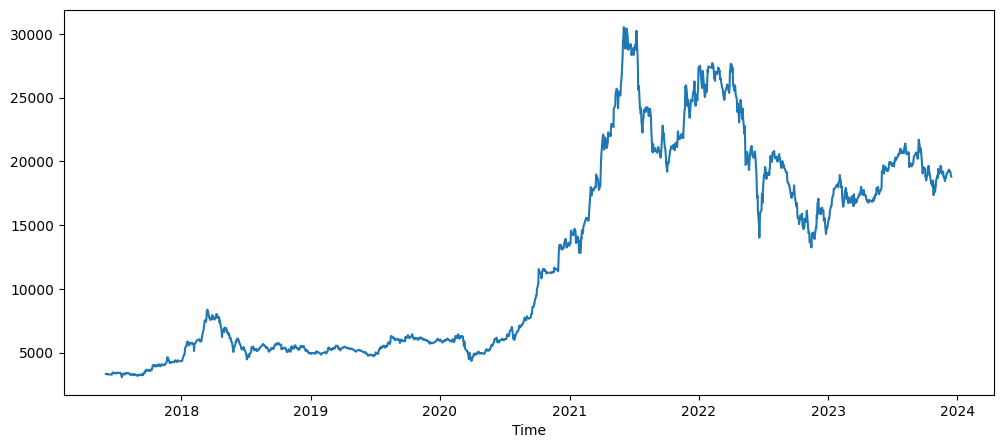

In [3]:
# Import data
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
print(pd.DataFrame(VIB.head(6)))
train_dates = VIB.index
plt.figure(figsize=(12, 5))
VIB["Close"].plot()

In [4]:
VIB = VIB.reset_index(drop = True)
df = VIB['Close']
df

0        3320
1        3290
2        3320
3        3340
4        3310
        ...  
1629    19200
1630    19200
1631    19050
1632    18900
1633    18800
Name: Close, Length: 1634, dtype: int64

In [5]:
## (A) CEEMDAN
#### 1. Thêm white noise vào chuỗi gốc s(t) thành chuỗi s1(t)
#### 2. Decompose chuỗi s1(t) bằng EMD ra các chuỗi IMF1 và Residue1
#### 3. Trung bình các chuỗi IMF1(t) thành mIMF1(t)
#### 4. r1(t) = s1(t) - mIMF1(t)
#### 5. Chuỗi mới s2(t) = r1(t) + coef*EMD(noise)
#### 6. Làm lại từ 1->5 đến khi chuỗi residue dừng

## (A) CEEMDAN
#### 1. Thêm white noise vào chuỗi gốc s(t) thành chuỗi s1(t)
#### 2. Decompose chuỗi s1(t) bằng EMD ra các chuỗi IMF1 và Residue1
#### 3. Trung bình các chuỗi IMF1(t) thành mIMF1(t)
#### 4. r1(t) = s1(t) - mIMF1(t)
#### 5. Chuỗi mới s2(t) = r1(t) + coef*EMD(noise)
#### 6. Làm lại từ 1->5 đến khi chuỗi residue dừng

In [6]:
from PyEMD import EMD, CEEMDAN

In [7]:
#ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
ceemdan = CEEMDAN()
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [8]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8
0,13.453969,-5.041877,21.162998,-52.013049,33.119776,-42.436248,472.188345,2879.566086
1,-20.220988,-5.204629,28.254364,-55.725270,34.416354,-43.007053,472.941441,2878.545781
2,1.433484,0.083524,33.445972,-58.483058,35.866383,-43.762211,473.869991,2877.545915
3,3.887495,18.410794,33.514860,-60.131291,37.482188,-44.705578,474.975070,2876.566461
4,3.574793,-4.822711,26.414801,-60.458953,39.267816,-45.840809,476.257652,2875.607410
...,...,...,...,...,...,...,...,...
1629,-53.909108,120.069311,327.643717,-231.644636,-826.904545,3274.598221,-4753.815248,21343.962288
1630,43.082517,67.482323,290.221069,-248.733800,-809.932534,3270.687759,-4748.661214,21335.853879
1631,19.130237,-0.173157,232.842552,-257.720704,-794.925424,3266.468310,-4743.299044,21327.677230
1632,-24.968712,-43.339180,165.715414,-259.055223,-781.995981,3261.940596,-4737.729240,21319.432326


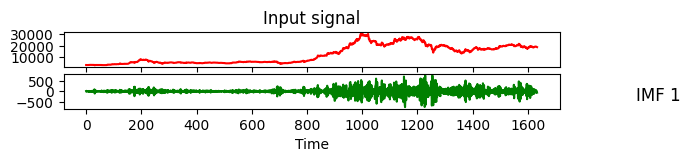

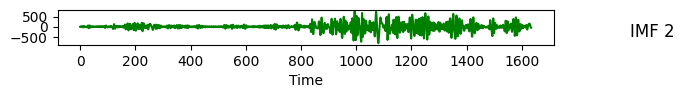

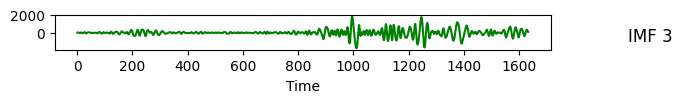

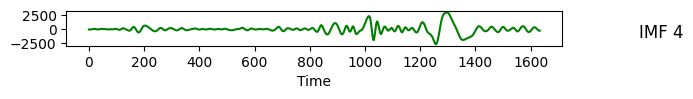

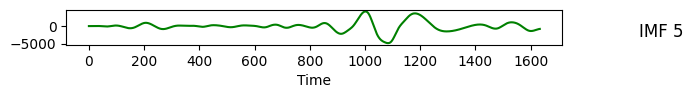

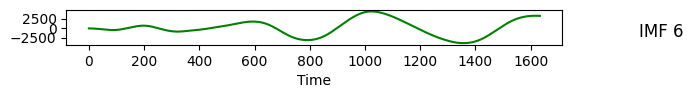

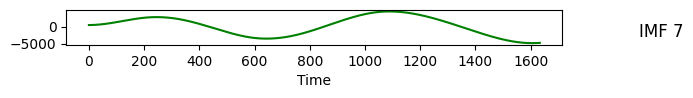

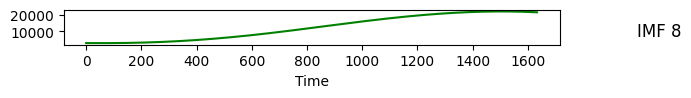

In [9]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [ ]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1634, 1)
Residue: (1634, 1)


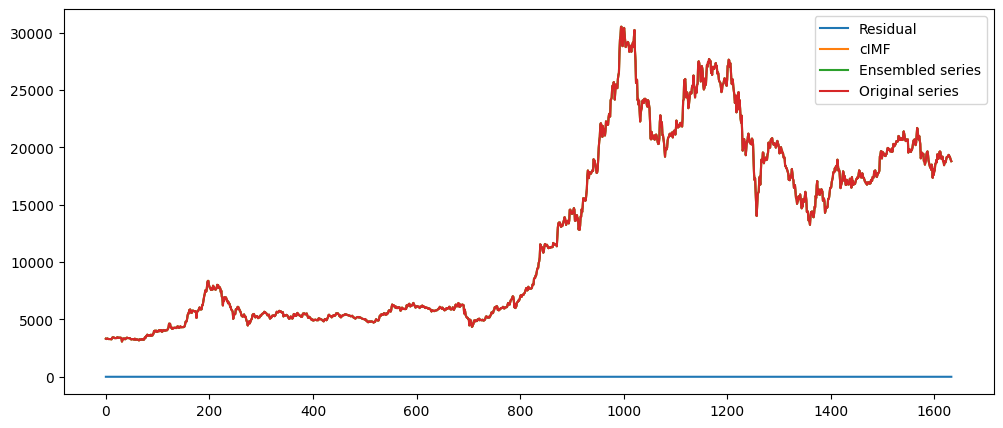

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

# (B) LSTM
## 0. Prepocessing

In [ ]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,PowerTransformer, MinMaxScaler, RobustScaler

In [ ]:
cIMF = cIMFs.sum(axis = 0).reshape(-1, 1)+residue
cIMF

array([[ 3320.],
       [ 3290.],
       [ 3320.],
       ...,
       [19050.],
       [18900.],
       [18800.]])

In [ ]:
# Scale data to 0-1
scaler = StandardScaler()
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
IMFscale = Scaling(cIMF)
#train_scaled = scaler.inverse_transform(train_scaled)
#pd.DataFrame(train_scaled, columns=["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

(1634, 1)
Train:  (1307, 1)
Test:  (327, 1)


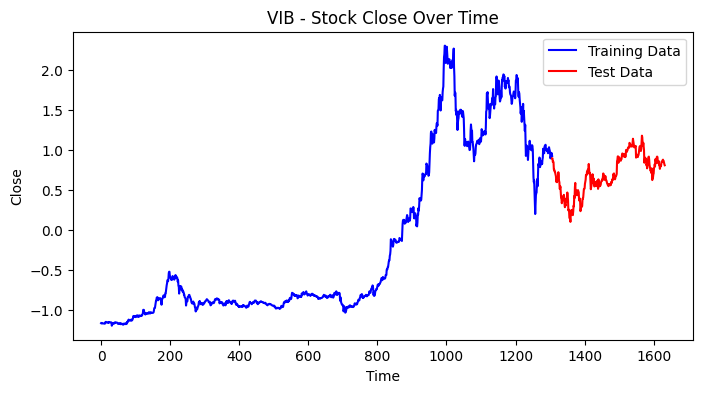

In [ ]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.8*IMFscale.shape[0])
test_size = int(0.2*IMFscale.shape[0])
train_data = IMFscale[:train_size].reshape(-1,1)
test_data = IMFscale[train_size:].reshape(-1,1)

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(8, 4))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size -1,  train_size+test_size), test_data, linestyle='-',  color='r', label='Test Data')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [ ]:
trainX = []
trainY = []

n_past = 60
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, 0:train_data.shape[1]]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, 0]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1247, 60, 1)
Y train:  (1247, 1)


In [ ]:
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, 0:test_data.shape[1]]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, 0]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (267, 60, 1)
Y test:  (267, 1)


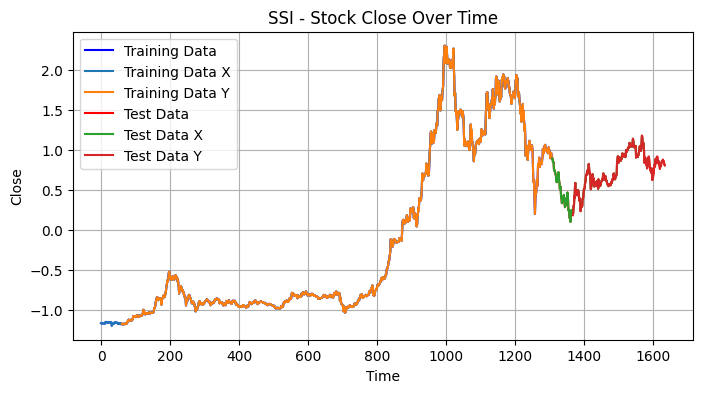

In [ ]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(8, 4))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('SSI - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

## 1. Train model

In [ ]:
## 1. Train model
# Tạo model lstm cho việc training
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=60, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/60
113/113 [==============================] - 5s 27ms/step - loss: 33.5564 - val_loss: 20.0911
Epoch 2/60
113/113 [==============================] - 3s 24ms/step - loss: 22.1578 - val_loss: 18.7264
Epoch 3/60
113/113 [==============================] - 3s 29ms/step - loss: 20.0815 - val_loss: 16.4382
Epoch 4/60
113/113 [==============================] - 3s 25ms/step - loss: 18.5781 - val_loss: 15.6766
Epoch 5/60
113/113 [==============================] - 3s 27ms/step - loss: 19.0663 - val_loss: 29.1550
Epoch 6/60
113/113 [==============================] - 3s 26ms/step - loss: 18.0869 - val_loss: 14.4206
Epoch 7/60
113/113 [==============================] - 3s 29ms/step - loss: 17.6946 - val_loss: 16.1071
Epoch 8/60
113/113 [==============================] - 3s 25ms/step - loss: 16.5670 - val_loss: 13.1625
Epoch 9/60
113/113 [==============================] - 3s 24ms/step - loss: 16.7405 - val_loss: 24.0568
Epoch 10/60
113/113 [==============================] - 3s 27ms/step - los

### 2. Use model to predict test set


In [ ]:
### 2. Use model to predict test set
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
print(y_pred_future)


9/9 [==============================] - 0s 9ms/step
[13975.968  13862.129  13979.497  14362.164  14543.707  15179.346
 15395.768  16125.459  16727.312  16155.945  15904.689  16077.12
 16163.318  15888.994  15959.774  15934.689  16115.603  16101.254
 16057.772  15539.173  15315.6455 15359.691  15254.731  14650.591
 14436.444  14545.487  14622.913  14614.609  14650.017  15064.289
 15286.561  15457.308  15762.464  16167.963  16326.692  16387.525
 16707.541  16968.033  17173.732  17568.393  17686.078  17690.72
 17949.033  17857.438  18101.03   18211.295  18220.5    18647.604
 18348.389  17894.94   17876.334  17789.93   17167.096  16540.275
 16516.025  16656.303  16817.686  17215.207  17654.182  17648.074
 17146.639  17280.188  17067.59   16726.18   16617.15   16906.21
 16966.14   16772.467  16666.312  16641.693  16700.572  17008.484
 16972.508  16798.658  16491.666  17018.041  16961.271  16927.258
 16695.729  16729.56   16731.195  16700.576  16826.285  16988.422
 17102.805  17132.434  17242

In [ ]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

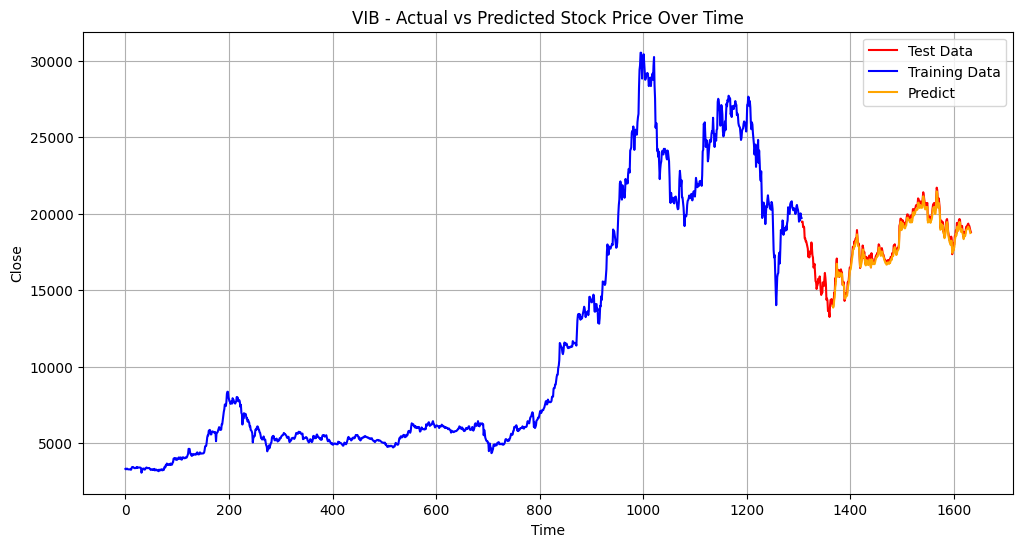

In [ ]:
plt.figure(figsize=(12, 6))
n_future = 60

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_back.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_back, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  y_pred_future, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

### 3. Predict 60 days

In [ ]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data.reshape(1,-1).T

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-60):])
  print(x.shape)
  x = x.T.reshape(x.shape[1], x.shape[0], 1)
  print(x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  y_c = np.repeat(y, x.shape[1], axis=-1)
  y_pr = scaler.inverse_transform(y_c)[:,0]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1,1)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(328, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(329, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(330, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
(331, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 19ms/step
(332, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 19ms/step
(333, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 20ms/step
(334, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 19ms/step
(335, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(336, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(337, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
(338, 1)
(60, 1)
(1, 60, 1)
1/1 [==============================] - 0s 19ms/step
(339, 1)
(60, 1)
(1, 60, 1)
1/1 [================

In [ ]:
print(y_forecast)

[[18629.709 ]
 [18479.828 ]
 [18332.115 ]
 [18190.295 ]
 [18053.887 ]
 [17922.527 ]
 [17795.967 ]
 [17673.9   ]
 [17555.988 ]
 [17441.887 ]
 [17331.26  ]
 [17223.793 ]
 [17119.2   ]
 [17017.217 ]
 [16917.611 ]
 [16820.174 ]
 [16724.719 ]
 [16631.078 ]
 [16539.105 ]
 [16448.666 ]
 [16359.636 ]
 [16272.044 ]
 [16185.823 ]
 [16100.867 ]
 [16017.064 ]
 [15934.306 ]
 [15852.487 ]
 [15771.514 ]
 [15691.297 ]
 [15611.761 ]
 [15532.831 ]
 [15454.443 ]
 [15376.538 ]
 [15299.06  ]
 [15221.956 ]
 [15145.178 ]
 [15068.681 ]
 [14992.42  ]
 [14916.354 ]
 [14840.442 ]
 [14764.647 ]
 [14688.931 ]
 [14613.257 ]
 [14537.591 ]
 [14461.8955]
 [14386.141 ]
 [14310.291 ]
 [14234.392 ]
 [14158.371 ]
 [14082.156 ]
 [14005.69  ]
 [13928.929 ]
 [13851.862 ]
 [13775.428 ]
 [13699.96  ]
 [13625.569 ]
 [13552.765 ]
 [13482.538 ]
 [13415.247 ]
 [13351.041 ]]


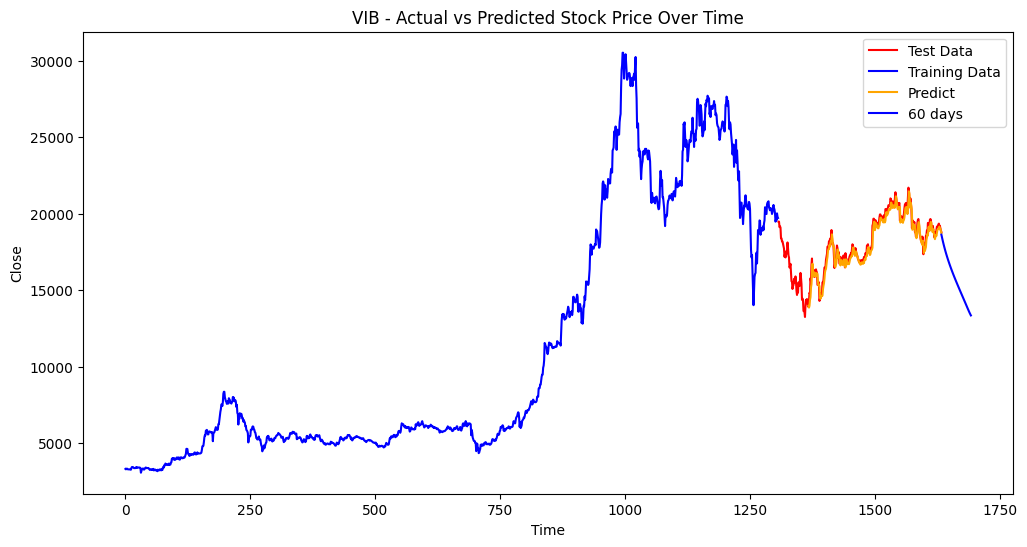

In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_back.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_back, linestyle='-', color='b', label='Training Data')
# Plot predict test and actual test
plt.plot(range(train_size + 60, train_size + test_size+1),  y_pred_future, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), y_forecast, linestyle='-', color='b', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [ ]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))

In [ ]:
print("RSME: ", RSME(y_pred_future, test_back[60:]))
print("MAE: ", MAE(y_pred_future, test_back[60:]))
print("MAPE: ", MAPE(y_pred_future, test_back[60:]))
print("MSLR: ", MSLE(y_pred_future, test_back[60:]))

RSME:  2347.2890485517178
MAE:  1891.1633932254406
MAPE:  10.446114510431691
MSLR:  0.01727622636800288
